Thomas Dougherty

Probability and Statistics for Computer Science


### Analysis of the On-Time Performance (OTP) of New Jersey Transit Commuter Rail<br>
On-time performance refers to the level of success of a service adhering to its schedule. In this example I'll be exploring NJT commuter rail from March 2018 to March 2020. On-time performance data can be used for schedule planning, passenger information systems, and comparison to weather data. 
    

#### Data cleanup

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from helper_functions import *


#all_services = helper.combine_csvs("data\\services\\")
print("Reading CSV....")
all_services = pd.read_csv('data\\all_services.csv')
all_services = helper.format_services(all_services)

weather = pd.read_csv('data\\weather.csv')
all_services.head(10)

### Visualization of On Time Performance
There is no conventional definition of 'On Time'. In the airline industry, there is a  In this project, 'On Time' will be defined as an arrival of less than 3 minutes late. 

All Services

['Northeast Corrdr', 'No Jersey Coast', 'Main Line', 'Morristown Line', 'Gladstone Branch', ..., 'Bergen Co. Line ', 'Atl. City Line', 'Montclair-Boonton', 'Princeton Shuttle', 'Pascack Valley']
Length: 11
Categories (11, object): ['Atl. City Line', 'Bergen Co. Line ', 'Gladstone Branch', 'Main Line', ..., 'Northeast Corrdr', 'Pascack Valley', 'Princeton Shuttle', 'Raritan Valley']


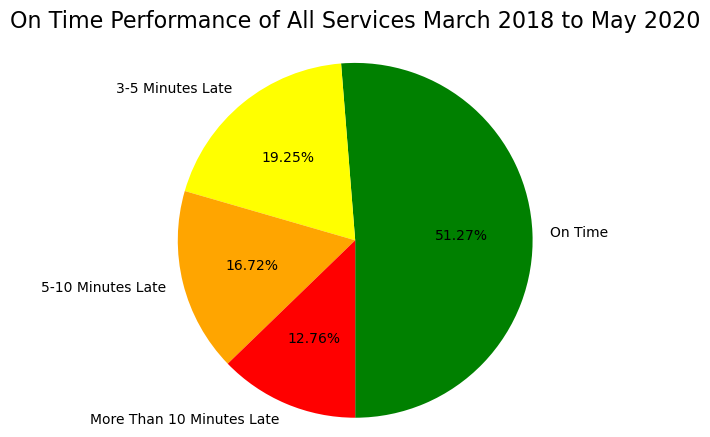

In [21]:
print(all_services['line'].unique())
helper.chart_otp(all_services,"On Time Performance of All Services March 2018 to May 2020")

In Autumn, tree leaves tend to fall on the rails. As they're crushed by the weight of the trains, the wheels of the train and the rails they ride on become coated in a slippery residue. Unlike snow, the build up cannot be prevented by the frequent running of trains. 

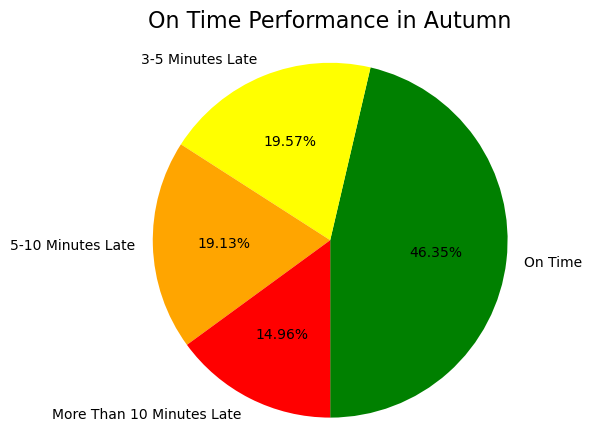

In [22]:
helper.chart_otp(all_services[(all_services['date'].dt.month >=9)],"On Time Performance in Autumn")

##### OTP by Line

In [ ]:


labels = ['On Time', '3-5 Minutes Late', '5-10 Minutes Late', 'More Than 10 Minutes Late']
colors = ['green', 'yellow', 'orange', 'red']
fields = ['on_time', '3_5_mins_late', '5_10_mins_late', 'grtr_10_mins_late']

fig, ax = plt.subplots(1, figsize=(12, 10))
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]

data = np.array(11)

helper.categorize_lateness(all_services[all_services['line'] == 'No Jersey Coast'])
  


#### March 2018 - Use with weather data

In [ ]:
 #create new dataframe with data broken down by line
mar_2018 = all_services[(all_services['date'].dt.month == 3) & (all_services['date'].dt.year == 2018)]
njt_lines=mar_2018['line'].unique()
# get data for new df columns
max_delays = pd.Series(helper.get_max_delay(mar_2018,njt_lines)).round(3)
avg_delays = pd.Series(helper.get_avg_delay(mar_2018,njt_lines)).round(3)
dates = pd.Series(helper.get_delay_date(mar_2018,njt_lines))
train_ids = pd.Series(helper.get_train_ids(mar_2018,njt_lines))

performance_by_line_march = helper.create_new_dataframe(njt_lines, max_delays, avg_delays, dates)

march_weather = helper.format_weather(weather,'March')
march_weather.head(10)